# Visualizing Scientific Data 

The global land temperature dataset contains hundreds of thousands of measurements. Discovering patterns in this data can very difficult. However, it becomes a lot easier if we visualize it.

<center><img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Global_Temperature_Anomaly_-_slower-500.gif/640px-Global_Temperature_Anomaly_-_slower-500.gif'><center>

**Import Numpy and Pandas**

In [35]:
import pandas as pd
import numpy as np

There are many Python libraries to visualize data but Matplotlib is a great one to start.

In [36]:
import matplotlib.pyplot as plt

We will use the same dataset as before which contains temperatures from cities all over the world going back to the mid-1700's. Let's see how temperatures have changed over the years.

In [37]:
data = pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


**Run this cell to filter the original dataset and change the column names.**

In [38]:
temps = data[['dt', 'AverageTemperature', 'City', 'Country']]
temps.columns = ['date','ave_temp', 'city', 'country']
temps.head()

,date,ave_temp,city,country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire


### Datetime

When working with "time series" data such as this, it is useful to change the index to datetime. This will allow us to plot the data by time.

In [40]:
temps.index = pd.to_datetime(temps['date'])
temps.head()

,date,ave_temp,city,country
date,,,,
1849-01-01,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1849-02-01,1849-02-01,27.434,Abidjan,Côte D'Ivoire
1849-03-01,1849-03-01,28.101,Abidjan,Côte D'Ivoire
1849-04-01,1849-04-01,26.140,Abidjan,Côte D'Ivoire
1849-05-01,1849-05-01,25.427,Abidjan,Côte D'Ivoire


### Get the temperatures for Chicago

**Make a new dataframe called `chicago` that contains only the entries for the city of Chicago.**

In [41]:
chicago = temps[temps['city'] == 'Chicago']
chicago.head()

,date,ave_temp,city,country
date,,,,
1743-11-01,1743-11-01,5.436,Chicago,United States
1743-12-01,1743-12-01,NaN,Chicago,United States
1744-01-01,1744-01-01,NaN,Chicago,United States
1744-02-01,1744-02-01,NaN,Chicago,United States
1744-03-01,1744-03-01,NaN,Chicago,United States


### Your First Plot

A plot is a simple visualization that draws a line from point to point. 

**Define which data will be used for the x and y axes and label the line.**

In [43]:
plt.plot(chicago.index, chicago['ave_temp'], label="Chicago")

**Include a legend that shows the label.**

In [43]:
plt.legend()

**Give the plot a title.**

In [43]:
plt.title("Monthly Average Temperature", fontsize=20)

**Label the x and y axes.**

In [43]:
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Temperature (C)", fontsize=14);

**Create the figure and set its size.**

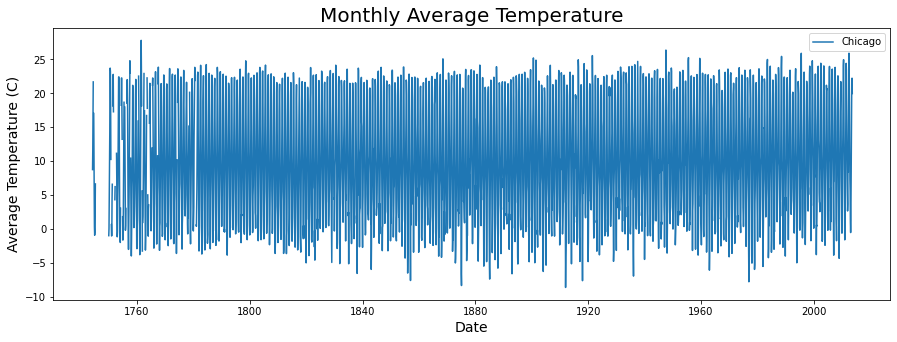

In [43]:
fig = plt.gcf()
fig.set_size_inches(15, 5) 

**Plot the data for only 2000 to 2009.**

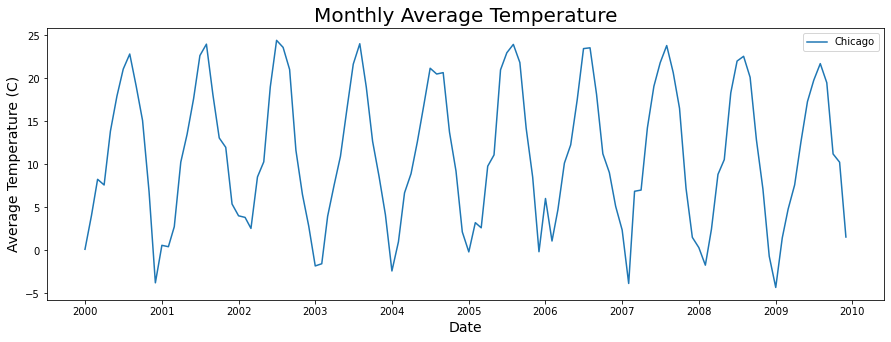

In [58]:
chicago2 = chicago['2000-01-01':'2009-12-31']

plt.plot(chicago2.index, chicago2['ave_temp'], label='Chicago')

plt.legend()

plt.title("Monthly Average Temperatures by City", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Temperature (C)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5)

### Rolling Means

Scientific data can be very "noisy". We can smooth it out using a **rolling mean**. This will average the temperatures within a certain window of time.

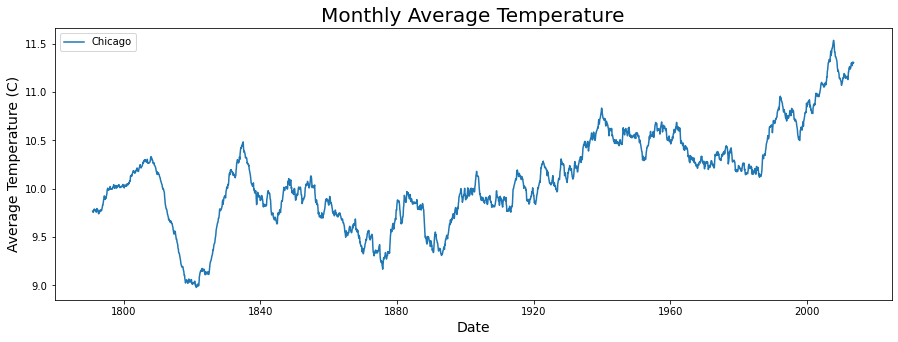

In [60]:
plt.plot(chicago.index, chicago['ave_temp'].rolling(120).mean(), label='Chicago')

plt.legend()

plt.title("Monthly Average Temperatures by City", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Temperature (C)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

**Compare Chicago to another city.**

By making the variable `state2` we can easily change the state in one spot and not have to change it the code that follows.

In [74]:
city2 = "New York"
city2_temps = temps[temps['city'] == city2]

We can use the same technique for the window size of the rolling mean.

In [75]:
window_size = 120

**Add `city2` to the same plot as the Chicago numbers.**

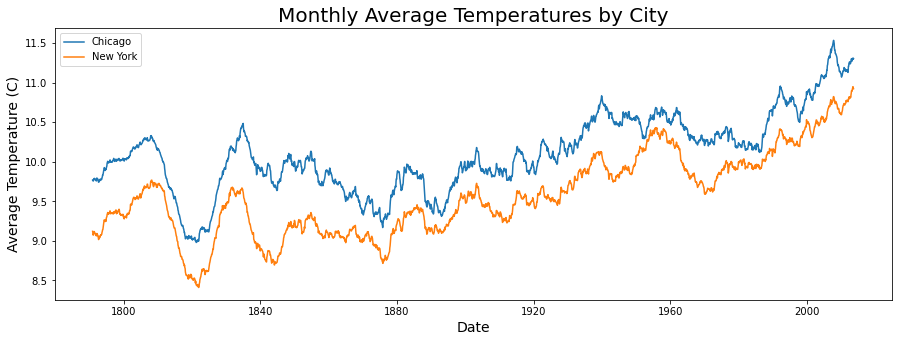

In [76]:
plt.plot(chicago['ave_temp'].rolling(window_size).mean(), label='Chicago')

plt.plot(city2_temps['ave_temp'].rolling(window_size).mean(), label=city2)

plt.legend()

plt.title("Monthly Average Temperatures by City", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Temperature (C)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### Now it's your turn...

**Can you write some code so that you can plot multiple cities for a certain time range and easily change the cities and time period?**